The aim of this project is to perform a time series analysis of APPLE and Intel Corporation stock, to study the historic corporate actions of each company, and how these actions impact the firms' equity. This analysis would also predict what AAPLE and Intel Corporation equity would look like if they are to merge together. Which company would mostly like give up their top executives if the opportunity were to arise. Is there a corelation between their stocks' actual price and the true value of their stock? Could their stock reflect or indicate how each company took corrective action whenever the rival corporate action were bad.

Read about corporate action here https://www.investopedia.com/terms/a/adjusted_closing_price.asp#:~:text=Key%20Takeaways-,The%20adjusted%20closing%20price%20amends%20a%20stock's%20closing%20price%20to,price%20before%20the%20market%20closes.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import requests

In [94]:
# call quand API for AAPL
aapl_api = "https://www.quandl.com/api/v3/datasets/EOD/AAPL.csv?api_key=ydWv6UATm3p8xLJXKVCj"
AAPL = pd.read_csv(aapl_api)
AAPL['Date'] = pd.to_datetime(AAPL.Date)
AAPL.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,171.00,171.850,170.480,171.08,16480187.0,0.0,1.0,41.075401,41.279577,40.950493,41.094617,65920748.0
1,2017-12-27,170.10,170.780,169.710,170.60,21498213.0,0.0,1.0,40.859214,41.022555,40.765534,40.979318,85992852.0
2,2017-12-26,170.80,171.470,169.679,170.57,33185536.0,0.0,1.0,41.027359,41.188298,40.758087,40.972112,132742144.0
3,2017-12-22,174.68,175.424,174.500,175.01,16349444.0,0.0,1.0,41.959363,42.138077,41.916125,42.038631,65397776.0
4,2017-12-21,174.17,176.020,174.100,175.01,20949896.0,0.0,1.0,41.836857,42.281240,41.820043,42.038631,83799584.0


In [100]:
# call quand API for INTC

INTC_api = 'https://www.quandl.com/api/v3/datasets/EOD/INTC.csv?api_key=ydWv6UATm3p8xLJXKVCj'
INTC = pd.read_csv(INTC_api)
INTC['Date'] = pd.to_datetime(INTC.Date)
INTC.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,46.36,46.36,45.95,46.22,9504372.0,0.0,1.0,42.812145,42.812145,42.433522,42.682859,9504372.0
1,2017-12-27,46.11,46.36,46.00,46.11,13359671.0,0.0,1.0,42.581277,42.812145,42.479695,42.581277,13359671.0
2,2017-12-26,46.28,46.47,45.95,46.08,15533328.0,0.0,1.0,42.738267,42.913727,42.433522,42.553573,15533328.0
3,2017-12-22,46.33,47.02,46.02,46.70,33913537.0,0.0,1.0,42.784441,43.421636,42.498165,43.126125,33913537.0
4,2017-12-21,47.54,47.59,46.56,46.76,42963451.0,0.0,1.0,43.901841,43.948015,42.996839,43.181534,42963451.0


In [95]:
AAPL.shape

(1090, 13)

In [77]:
INTC.shape

(1090, 13)

In [97]:
price1 = pd.DataFrame(AAPL)
price1 = price1[['Close', 'Date']]
price1 = price1.set_index('Date')
price1.head(3)

,Close
Date,
2017-12-28,171.08
2017-12-27,170.60
2017-12-26,170.57


In [82]:
prices = pd.DataFrame(INTC)
prices = prices[['Close', 'Date']]
prices = prices.set_index('Date')
prices.head(3)

,Close
Date,
2017-12-28,46.22
2017-12-27,46.11
2017-12-26,46.08


In [111]:
clean_AAPL =AAPL.drop(columns =['Dividend','Split'])
clean_AAPL.head(3)

,Date,Open,High,Low,Close,Volume,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,171.0,171.85,170.480,171.08,16480187.0,41.075401,41.279577,40.950493,41.094617,65920748.0
1,2017-12-27,170.1,170.78,169.710,170.60,21498213.0,40.859214,41.022555,40.765534,40.979318,85992852.0
2,2017-12-26,170.8,171.47,169.679,170.57,33185536.0,41.027359,41.188298,40.758087,40.972112,132742144.0


In [108]:
clean_INTC =INTC.drop(columns =['Dividend','Split'])
clean_INTC.head(3)

,Date,Open,High,Low,Close,Volume,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2017-12-28,46.36,46.36,45.95,46.22,9504372.0,42.812145,42.812145,42.433522,42.682859,9504372.0
1,2017-12-27,46.11,46.36,46.00,46.11,13359671.0,42.581277,42.812145,42.479695,42.581277,13359671.0
2,2017-12-26,46.28,46.47,45.95,46.08,15533328.0,42.738267,42.913727,42.433522,42.553573,15533328.0


In [85]:
clean_INTC = pd.DataFrame(INTC)
clean_INTC = clean_INTC.set_index('Date')
clean_INTC.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-12-28,46.36,46.36,45.95,46.22,9504372.0,0.0,1.0,42.812145,42.812145,42.433522,42.682859,9504372.0
2017-12-27,46.11,46.36,46.00,46.11,13359671.0,0.0,1.0,42.581277,42.812145,42.479695,42.581277,13359671.0
2017-12-26,46.28,46.47,45.95,46.08,15533328.0,0.0,1.0,42.738267,42.913727,42.433522,42.553573,15533328.0
2017-12-22,46.33,47.02,46.02,46.70,33913537.0,0.0,1.0,42.784441,43.421636,42.498165,43.126125,33913537.0
2017-12-21,47.54,47.59,46.56,46.76,42963451.0,0.0,1.0,43.901841,43.948015,42.996839,43.181534,42963451.0


<AxesSubplot:xlabel='Date'>

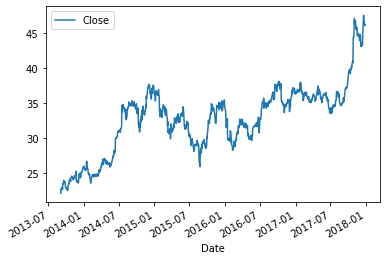

In [87]:
prices.plot()